<a href="https://colab.research.google.com/github/cr2uchile/Curso_Machine_Learning/blob/main/material/ejemplo_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN)

### Tensorflow <img src="https://www.tensorflow.org/images/tf_logo_32px.png" width="20">

"[Tensorflow](https://www.tensorflow.org/) es una plataforma de extremo a extremo de código abierto para el aprendizaje automático"

Esta plataforma permite crear y entrenar fácilmente modelos de Machine Learning. En particular usaremos su API Keras, la cual permite generar modelos secuenciales de Redes Neuronales.

En este ejemplo entrenaremos una CNN simple que resuelva el problema de clasificación de imágenes. En este caso utilizaremos la red para clasificar el dataset [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) alojado en el entorno de keras.

Cabe mencionar que actualmente la mejor clasificación que se ha hecho de este dataset ha logrado un [99.7%](https://paperswithcode.com/sota/image-classification-on-cifar-10) (2020) de precisión.

### Importar librerías

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
import numpy as np

#### Funciones auxiliares

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Matriz de confusión', cmap=plt.cm.Blues):
    """
    DESCRIPCION: Funcion que sirve para plotear una matriz de confusion.
    INPUT:
    (cm)         Matriz de confusion (n-darray)
    (classes)    Nombre de las clases, lista de strings con el nombre de cada clase.
    (title)      Titulo de la matriz de confusion, string.
    (cmap)       Color de la matriz de confusion
    """
    
    plt.figure(figsize=(14,10))
    plt.title(title,fontsize=18)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    # We change the fontsize of minor ticks label
    plt.tick_params(axis='both', which='major', labelsize=15)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.round(cm, decimals=3)

    thresh = cm.max() / 2.
    for i, j in itertools.product(list(range(cm.shape[0])), list(range(cm.shape[1]))):
        if normalize: 
            plt.text(j, i, '{:.1%}'.format(cm[i, j]),
                     horizontalalignment="center",
                     fontsize=12,
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     fontsize=12,
                     color="white" if cm[i, j] > thresh else "black")
            
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.colorbar()
    plt.grid(False)
    #plt.tight_layout()
    plt.ylabel('Real',fontsize=18)
    plt.xlabel('Predicción',fontsize=18)
    
    return None

### Descarga de imágenes desde el dataset CIFAR10

Procedemos a descargar el dataset y asignamos las variables de entrenamiento `(x_train, y_train)` y de prueba `(x_test, y_test)`. 

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

Siempre es importante saber como son los datos con los que uno está trabajando. Aquí procedemos a imprimir la "forma" de los datos descargados.

In [ ]:
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_test:  {x_test.shape}')
print(f'y_test:  {y_test.shape}')

input_shape = x_train[0].shape
print(f'\nInput shape: {input_shape}')

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)

Input shape: (32, 32, 3)


In [ ]:
print(f'Valor máximo de pixel original:    {x_train.max():.1f}')

# Normalizar los datos de cada pixel para obtener valor entre 0 y 1
x_train, x_test = x_train/255.0, x_test/255.0

print(f'Valor máximo de pixel normalizado:   {x_train.max()}')

Valor máximo de pixel original:    255.0
Valor máximo de pixel normalizado:   1.0


### Visualización de los datos

Para tener una mayor claridad de como son nuestros datos, elegiremos 25 imágenes al azar del conjunto de entrenamiento para visualizarlas.

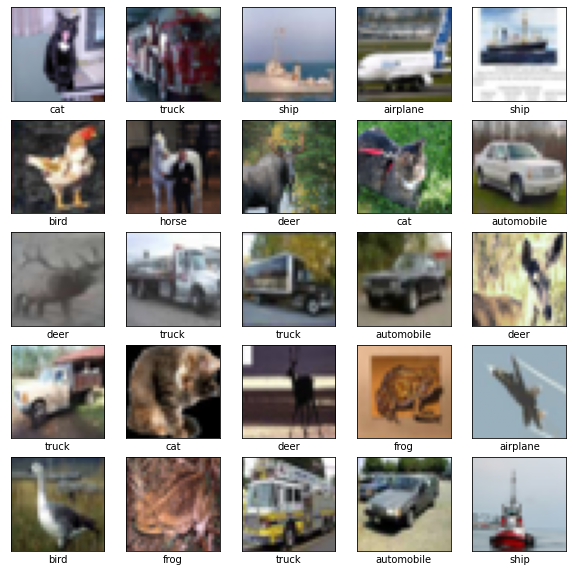

In [ ]:
import random

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

randomlist = random.sample(range(0, len(x_train)), 25)

plt.figure(figsize=(10,10))
for i, k in enumerate(randomlist):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[k], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[k][0]])
plt.show()

## Armar y entrenar modelo

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [ ]:
# Parámetros
opt = tf.keras.optimizers.Adam(0.001)
batch = 64
epo = 20

In [ ]:
model.compile(optimizer = opt,
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(x_train, y_train, 
                    batch_size = batch, epochs=epo,
                    validation_data = (x_test, y_test))

Epoch 1/20
782/782 [==============================] - 4s 4ms/step - loss: 1.8478 - accuracy: 0.3143 - val_loss: 1.3348 - val_accuracy: 0.5189
Epoch 2/20
782/782 [==============================] - 3s 3ms/step - loss: 1.3721 - accuracy: 0.5004 - val_loss: 1.1971 - val_accuracy: 0.5763
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 1.2316 - accuracy: 0.5577 - val_loss: 1.1137 - val_accuracy: 0.6050
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 1.1250 - accuracy: 0.5987 - val_loss: 1.1675 - val_accuracy: 0.5802
Epoch 5/20
782/782 [==============================] - 3s 3ms/step - loss: 1.0599 - accuracy: 0.6262 - val_loss: 1.0679 - val_accuracy: 0.6252
Epoch 6/20
782/782 [==============================] - 3s 3ms/step - loss: 0.9871 - accuracy: 0.6483 - val_loss: 1.0293 - val_accuracy: 0.6415
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 0.9387 - accuracy: 0.6684 - val_loss: 1.0622 - val_accuracy: 0.6351
Epoch 

313/313 - 1s - loss: 0.8484 - accuracy: 0.7096


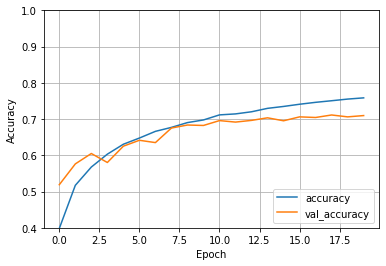

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

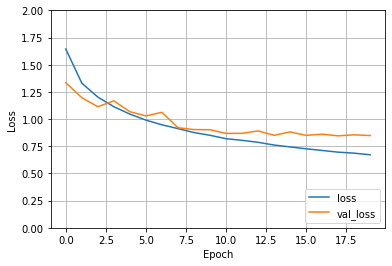

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

In [ ]:
# Cargar modelo guardado previamente
# model = tf.keras.models.load_model('//content//model.h5')

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = np.argmax(model.predict(x_test), axis=1)
acc_score = accuracy_score(y_test, y_pred)

print(f'Accuracy score: {acc_score}')

Accuracy score: 0.7096


Normalized confusion matrix


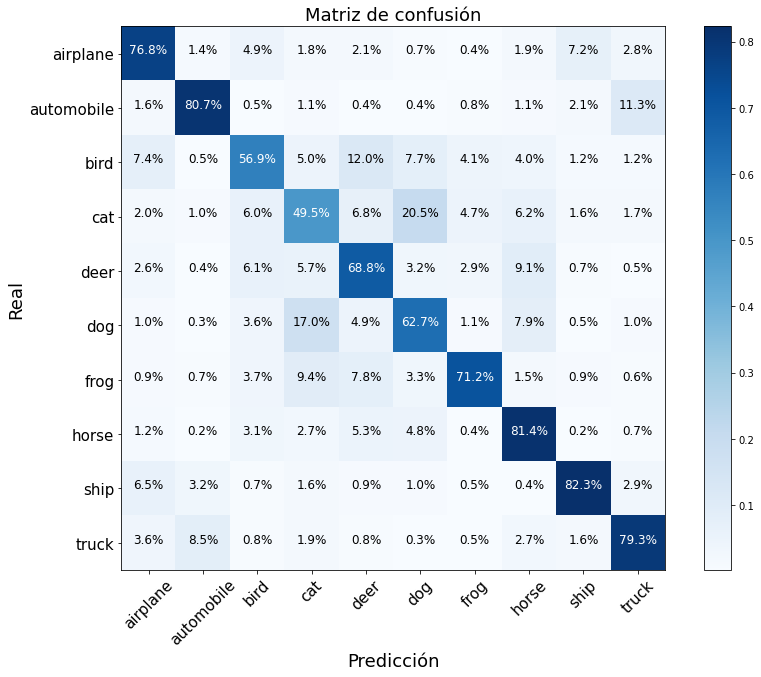

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, class_names, normalize=True)